In [6]:
# Data Acquisition and Inspection
# Mount Google Drive
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Download the data file from the shared link
!gdown --id '1xJbJw6jr2JfGSpqPLmsKy-xzkxPhDmKu'  # Replace with your Google Drive shared link file ID

# Read the file
data = pd.read_csv('Battery_RUL.csv')

# Inspect the data
print("\nColumn names:")
print(data.columns)

print("\nFirst 5 rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Fill missing values with mean
data.fillna(data.mean(), inplace=True)

# Descriptive statistics
print("\nDescriptive statistics of the dataset:")
print(data.describe())


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xJbJw6jr2JfGSpqPLmsKy-xzkxPhDmKu
To: /content/Battery_RUL.csv
100% 1.14M/1.14M [00:00<00:00, 28.8MB/s]

Column names:
Index(['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
       'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)',
       'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)',
       'RUL'],
      dtype='object')

First 5 rows of the dataset:
   Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  \
0          1.0             2595.30             1151.488500   
1          2.0             7408.64             1172.512500   
2          3.0             7393.76             1112.992000   
3          4.0             7385.50             1080.320667   
4          6.0      

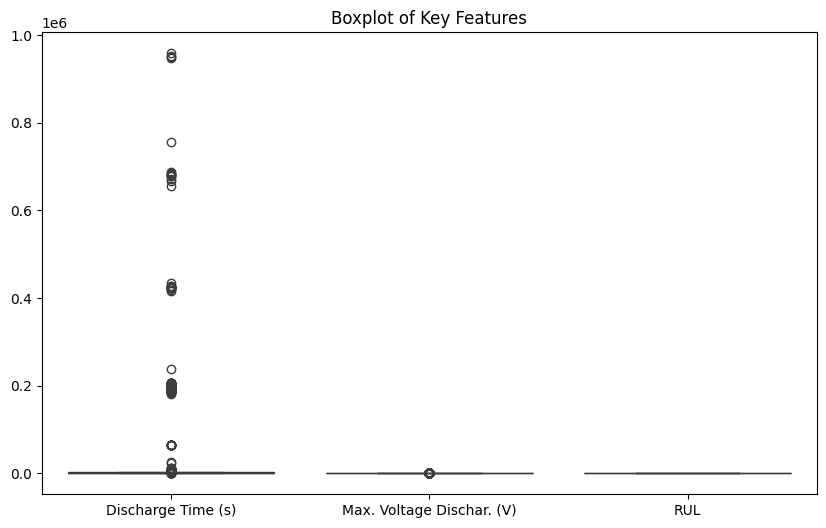

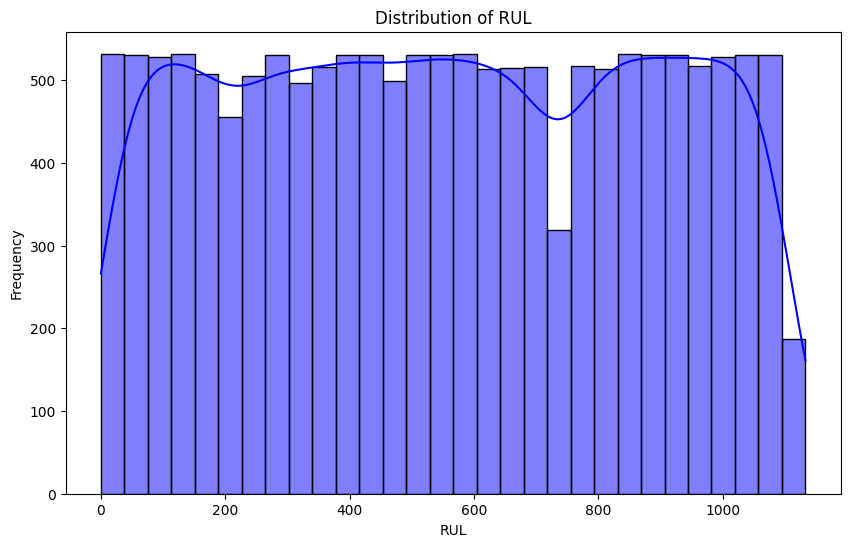

In [7]:
# Exploratory Data Analysis (EDA)
# Boxplot to detect potential outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Discharge Time (s)', 'Max. Voltage Dischar. (V)', 'RUL']])
plt.title("Boxplot of Key Features")
plt.show()

# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['RUL'], kde=True, bins=30, color='blue')
plt.title("Distribution of RUL")
plt.xlabel("RUL")
plt.ylabel("Frequency")
plt.show()




Normalized data (first 5 rows):
   Discharge Time (s)  Max. Voltage Dischar. (V)       RUL
0            0.002699                   0.475000  0.981465
1            0.007722                   0.911364  0.980583
2            0.007706                   0.913636  0.979700
3            0.007698                   0.914394  0.978817
4            0.067842                   0.944697  0.977052


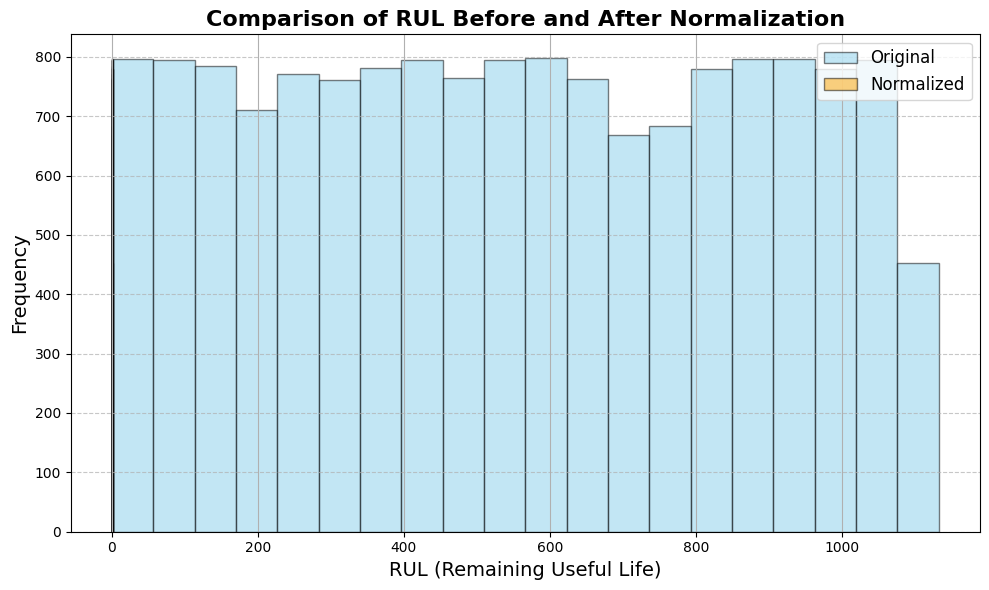

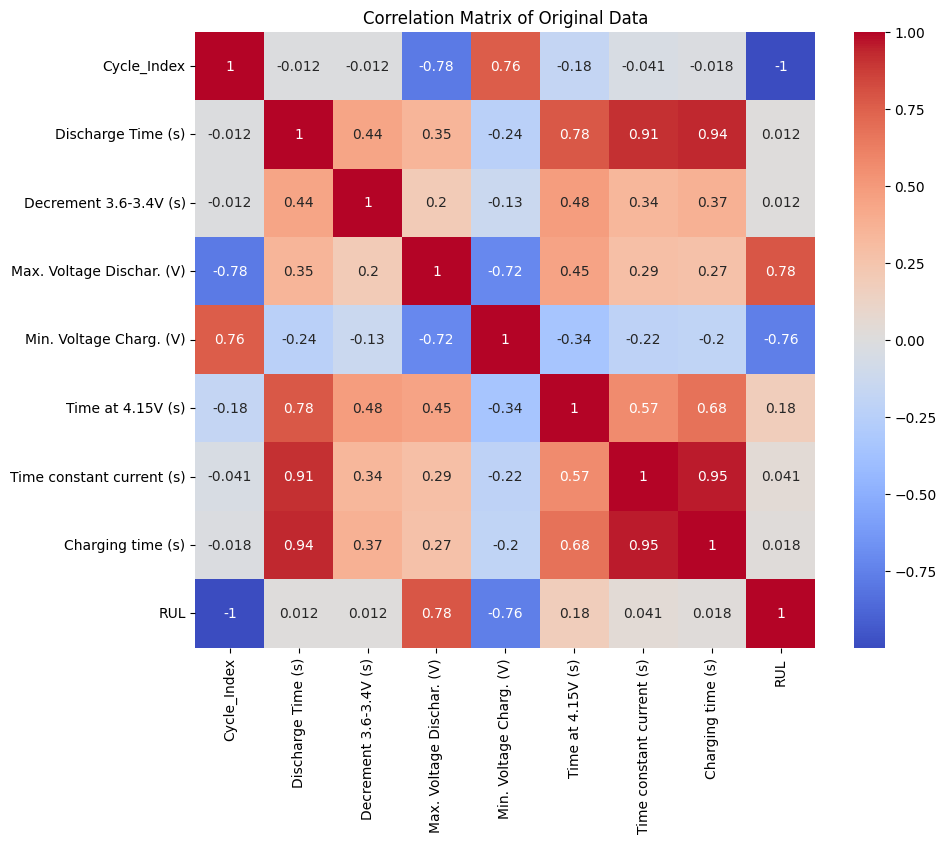

In [8]:
# Data Normalization
scaler = MinMaxScaler()

# Select columns to normalize (adjust column names according to your dataset)
columns_to_scale = ['Discharge Time (s)', 'Max. Voltage Dischar. (V)', 'RUL']
data_scaled = scaler.fit_transform(data[columns_to_scale])

# Convert to DataFrame
scaled_data_df = pd.DataFrame(data_scaled, columns=columns_to_scale)

# Display normalized data
print("\nNormalized data (first 5 rows):")
print(scaled_data_df.head())

# Optimized histogram comparing data before and after normalization
plt.figure(figsize=(10, 6))

# Histogram of original data
data['RUL'].hist(alpha=0.5, label='Original', bins=20, color='skyblue', edgecolor='black')

# Histogram of normalized data
scaled_data_df['RUL'].hist(alpha=0.5, label='Normalized', bins=20, color='orange', edgecolor='black')

# Chart optimization
plt.legend(loc='upper right', fontsize=12)  # Legend position and font size
plt.title('Comparison of RUL Before and After Normalization', fontsize=16, fontweight='bold')  # Title style
plt.xlabel('RUL (Remaining Useful Life)', fontsize=14)  # X-axis label
plt.ylabel('Frequency', fontsize=14)  # Y-axis label
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines

# Show chart
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Original Data')
plt.show()



New features (first 5 rows):
   Cycle_Index   RUL  Degradation Rate  Voltage_Time_Ratio
0          1.0  1112           1112.00            0.001414
1          2.0  1111            555.50            0.000573
2          3.0  1110            370.00            0.000575
3          4.0  1109            277.25            0.000575
4          6.0  1107            184.50            0.000066


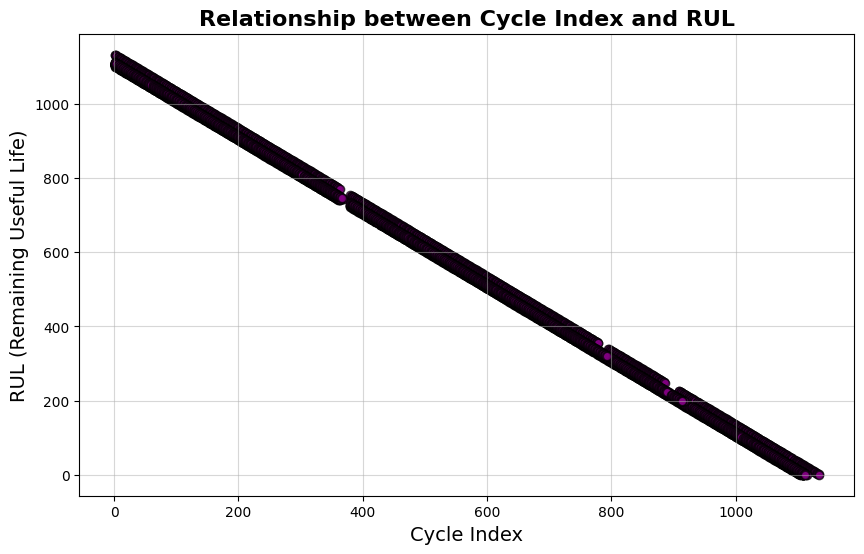

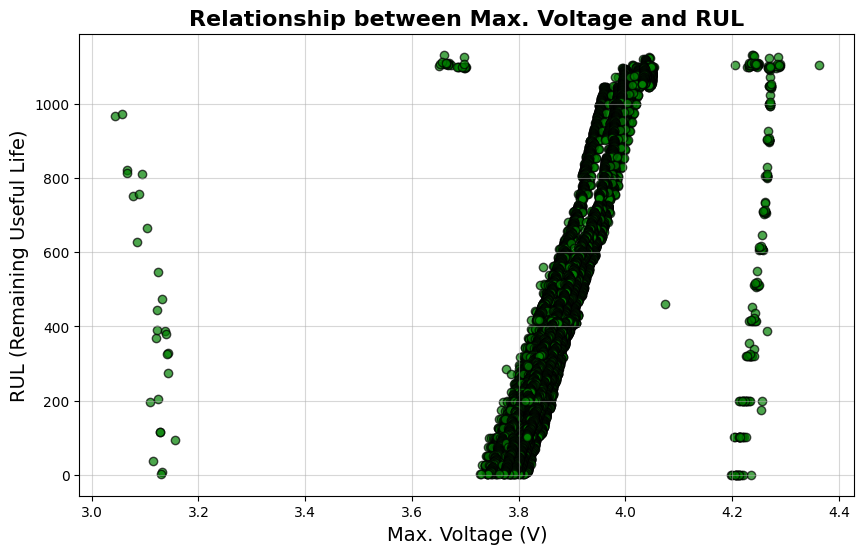

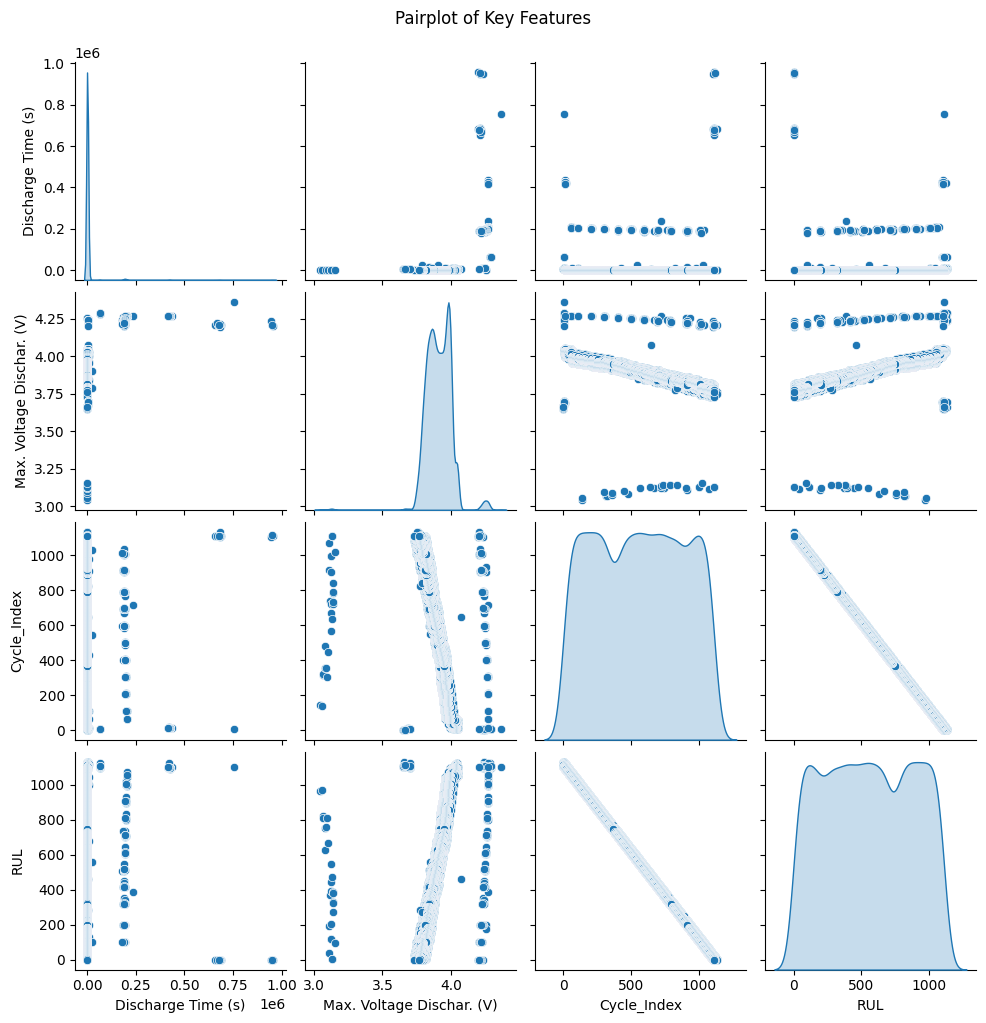

In [9]:
# Feature Engineering
# Create new features: Battery degradation rate and voltage-time ratio
data['Degradation Rate'] = data['RUL'] / data['Cycle_Index']
data['Voltage_Time_Ratio'] = data['Max. Voltage Dischar. (V)'] / data['Discharge Time (s)']
print("\nNew features (first 5 rows):")
print(data[['Cycle_Index', 'RUL', 'Degradation Rate', 'Voltage_Time_Ratio']].head())

# Scatter plot: Cycle_Index vs RUL
plt.figure(figsize=(10, 6))
plt.scatter(data['Cycle_Index'], data['RUL'], alpha=0.7, color='purple', edgecolor='black')
plt.title('Relationship between Cycle Index and RUL', fontsize=16, fontweight='bold')
plt.xlabel('Cycle Index', fontsize=14)
plt.ylabel('RUL (Remaining Useful Life)', fontsize=14)
plt.grid(alpha=0.5)
plt.show()

# Scatter plot: Max. Voltage vs RUL
plt.figure(figsize=(10, 6))
plt.scatter(data['Max. Voltage Dischar. (V)'], data['RUL'], alpha=0.7, color='green', edgecolor='black')
plt.title('Relationship between Max. Voltage and RUL', fontsize=16, fontweight='bold')
plt.xlabel('Max. Voltage (V)', fontsize=14)
plt.ylabel('RUL (Remaining Useful Life)', fontsize=14)
plt.grid(alpha=0.5)
plt.show()

# Pairplot for relationships among key features
sns.pairplot(data[['Discharge Time (s)', 'Max. Voltage Dischar. (V)', 'Cycle_Index', 'RUL']], diag_kind='kde')
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()




In [10]:
# Dataset Splitting
X = data[['Discharge Time (s)', 'Max. Voltage Dischar. (V)', 'Cycle_Index', 'Voltage_Time_Ratio']]
y = data['RUL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")

Training set size: (12051, 4), Testing set size: (3013, 4)


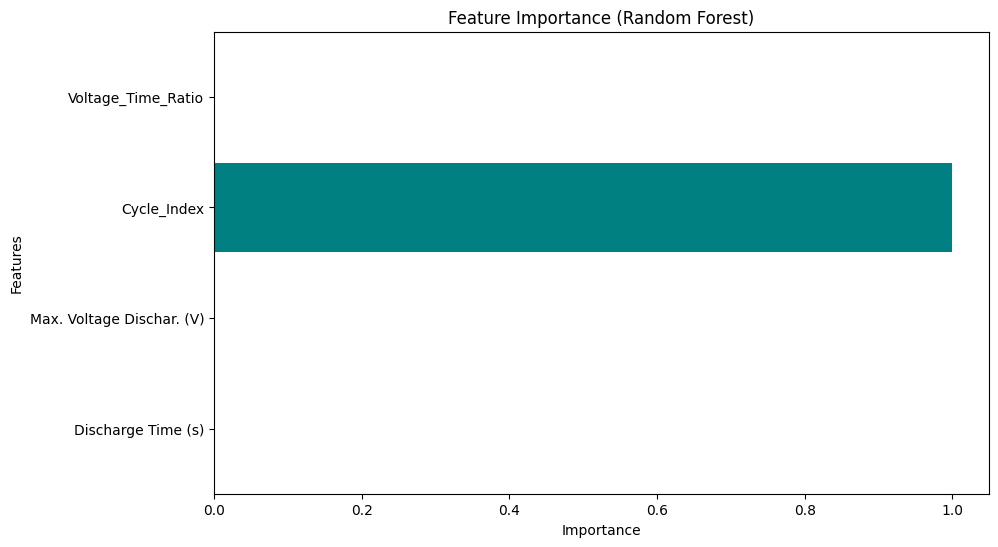


=== Random Forest Model Performance ===
Mean Squared Error: 13.92910192516687
R² Score: 0.9998655305330113
Mean Absolute Error: 2.181649463436221

=== XGBoost Model Performance ===
Mean Squared Error: 19.126192092895508
R² Score: 0.9998153448104858
Mean Absolute Error: 2.869840621948242


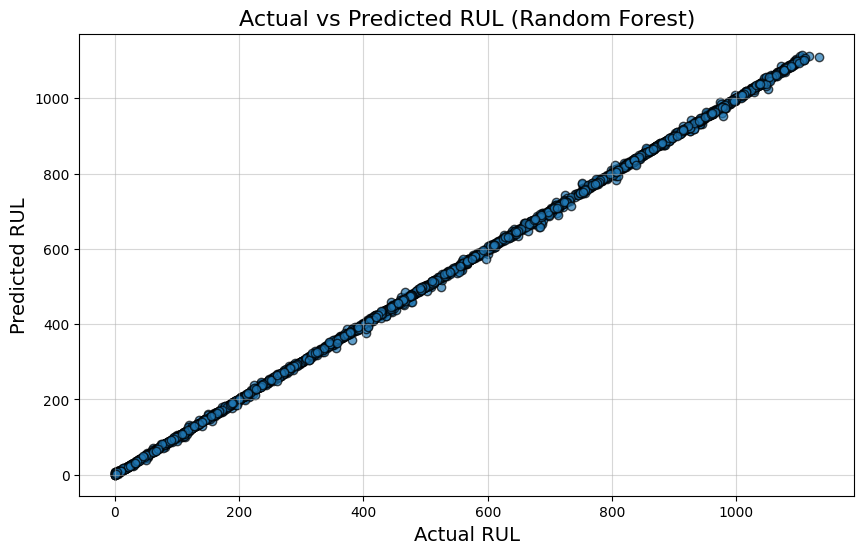

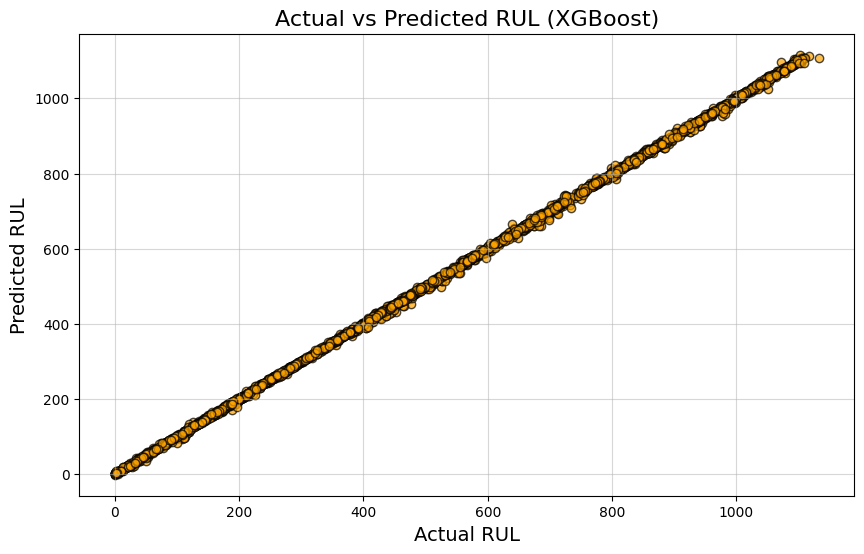


✅ Cross-Validated MSE (Random Forest): 80.91121755717207

✅ Cross-Validated MSE (XGBoost): 17.534671783447266


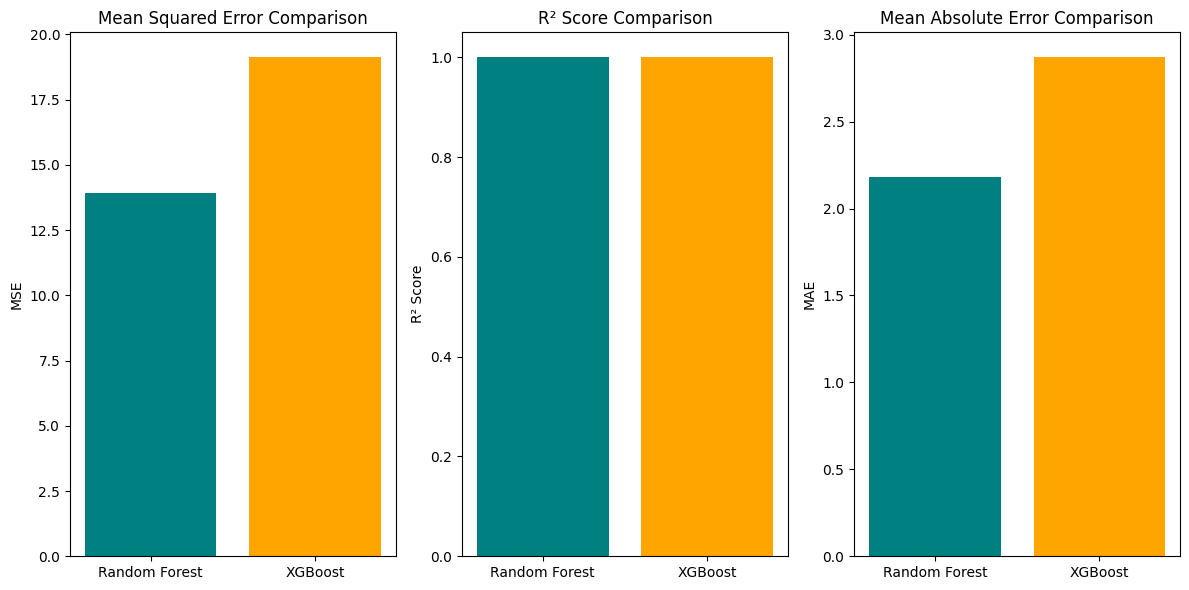

In [13]:
# 🎯 Train Model 1: Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# 🎯 Train Model 2: XGBoost
from xgboost import XGBRegressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# 🔥 Feature Importance (Random Forest)
import matplotlib.pyplot as plt
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, color='teal')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# 📊 Predictions
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

rf_predictions = rf_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

# 📌 Model Evaluation
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)

xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)

# 🎯 Print Evaluation Results
print("\n=== Random Forest Model Performance ===")
print(f"Mean Squared Error: {rf_mse}")
print(f"R² Score: {rf_r2}")
print(f"Mean Absolute Error: {rf_mae}")

print("\n=== XGBoost Model Performance ===")
print(f"Mean Squared Error: {xgb_mse}")
print(f"R² Score: {xgb_r2}")
print(f"Mean Absolute Error: {xgb_mae}")

# 📊 Actual vs Predicted Values (Random Forest)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, alpha=0.7, edgecolor='k')
plt.title('Actual vs Predicted RUL (Random Forest)', fontsize=16)
plt.xlabel('Actual RUL', fontsize=14)
plt.ylabel('Predicted RUL', fontsize=14)
plt.grid(alpha=0.5)
plt.show()

# 📊 Actual vs Predicted Values (XGBoost)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_predictions, alpha=0.7, edgecolor='k', color='orange')
plt.title('Actual vs Predicted RUL (XGBoost)', fontsize=16)
plt.xlabel('Actual RUL', fontsize=14)
plt.ylabel('Predicted RUL', fontsize=14)
plt.grid(alpha=0.5)
plt.show()

# 🚀 Cross-Validation
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# ✅ Cross-validation (Random Forest)
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
rf_mean_cv_score = -rf_cv_scores.mean()
print(f"\n✅ Cross-Validated MSE (Random Forest): {rf_mean_cv_score}")

# ✅ Manual Cross-Validation (XGBoost)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
xgb_mse_scores = []

for train_index, val_index in kf.split(X):
    X_train_cv, X_val_cv = X.iloc[train_index], X.iloc[val_index]
    y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]

    xgb_model.fit(X_train_cv, y_train_cv)
    val_predictions = xgb_model.predict(X_val_cv)

    mse = mean_squared_error(y_val_cv, val_predictions)
    xgb_mse_scores.append(mse)

xgb_mean_cv_score = np.mean(xgb_mse_scores)
print(f"\n✅ Cross-Validated MSE (XGBoost): {xgb_mean_cv_score}")

# 📊 Model Comparison Visualization
models = ['Random Forest', 'XGBoost']
mse_values = [rf_mse, xgb_mse]
r2_values = [rf_r2, xgb_r2]
mae_values = [rf_mae, xgb_mae]

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.bar(models, mse_values, color=['teal', 'orange'])
plt.title("Mean Squared Error Comparison")
plt.ylabel("MSE")

plt.subplot(1, 3, 2)
plt.bar(models, r2_values, color=['teal', 'orange'])
plt.title("R² Score Comparison")
plt.ylabel("R² Score")

plt.subplot(1, 3, 3)
plt.bar(models, mae_values, color=['teal', 'orange'])
plt.title("Mean Absolute Error Comparison")
plt.ylabel("MAE")

plt.tight_layout()
plt.show()

In [ ]:
# Save normalized data to a local file
scaled_data_df.to_csv('Battery_RUL_scaled.csv', index=False)
print("\nNormalized data has been saved as a local file: Battery_RUL_scaled.csv")

# Save prediction results and feature importance
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
predictions_df.to_csv('Predicted_RUL.csv', index=False)
print("Prediction results have been saved to Predicted_RUL.csv")

feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df.to_csv('Feature_Importance.csv', index=False)
print("Feature importance has been saved to Feature_Importance.csv")



Normalized data has been saved as a local file: Battery_RUL_scaled.csv
Prediction results have been saved to Predicted_RUL.csv
Feature importance has been saved to Feature_Importance.csv
